<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 4 - Machine Learning - Classification <br>
<font color=0CBCDF size=4>
   &#x1F335; Amirhossein Akbari  &#x1F335;
</div>

____

<font color=9999FF size=4>
&#x1F388; Full Name : Amirhossein Souri
<br>
<font color=9999FF size=4>
&#x1F388; Student Number : 401106182

<font color=0080FF size=3>
This Jupyter Notebook is dedicated to exploring a classification task focused on predicting traveler satisfaction levels with airline services. In our scenario, we aim to classify whether a passenger is satisfied or not based on various features related to their travel experience. To tackle this task, we will develop and compare three different machine learning models:
</font>
<br>

1. **Naive Bayes Classifier**: <font color=66B2FF size=2>We'll start by implementing a Naive Bayes classifier without the use of high-level libraries, understanding its mechanics and applying it to our dataset.</font>

2. **Decision Tree Classifier**: <font color=66B2FF size=2>Next, we will build a Decision Tree model from the ground up, enabling us to delve into how decisions are made and splits are performed based on the data.</font>

<font color=0080FF size=3>
For each model, we'll go through the process of data preprocessing, model training, and evaluation to compare their performance. By the end of this notebook, you should have a clear understanding of these models' workings and their effectiveness in predicting airline passenger satisfaction.
</font>

1. <font color=red size=3>**Run All Cells Before Submission**</font>: <font color=FF99CC size=2>Before saving and submitting your notebook, please ensure you run all cells from start to finish. This practice guarantees that your notebook is self-consistent and can be evaluated correctly by others.</font>

2. <font color=red size=3>**Model Evaluation and Scoring Criteria**</font>: <font color=FF99CC size=2>To receive full marks for a model implementation, the accuracy of your custom model must be within 5 percentage points of the corresponding scikit-learn model's accuracy. Should your model's accuracy fall more than <mark>5 percentage</mark> points below that of the scikit-learn model, or if the scikit-learn model's accuracy is below 80%, points will be deducted accordingly.</font>

<font color=#ffb578 size=3>
you are free to modify, add, or remove any cells as you see fit to complete your tasks. Feel free to change any of the provided code or content to better suit your understanding and approach to the problems.

- **Questions**: If you have any questions or require clarifications as you work through the notebook, please do not hesitate to ask. You can post your queries on Quera or reach out via Telegram.
- **Feedback**: We encourage you to seek feedback and engage in discussions to enhance your learning experience and improve your solutions.
</font>

Importing necessary libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import statistics as st

Before proceeding, please execute the cell below to download the dataset if you're using Kaggle or Colab; if running locally, utilize the dataset in the 'HW' folder.

In [2]:
current_path = os.getcwd()
data_url = "https://www.dropbox.com/scl/fi/75xu0qz933plnpid1uplz/AI-HW4-Q2-Data.csv?rlkey=47o5ksm1qyoabswahequk7t1d&dl=0"
data_path = os.path.join(current_path, "data.csv")
!wget -q -O "{data_path}" "{data_url}"

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc


# Data Exploration (5 point)
In this section, we perform some data exploration to get a better understanding of the data.

## Task1: Load and Inspect the Dataset (2 point)
Load the train dataset as a dataframe and show the first 10 rows of the dataframe

In [3]:
data = pd.read_csv('Dataset/train.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)

data.head(10)

,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Online boarding,Seat comfort,Inflight entertainment,satisfaction
0,Loyal Customer,Personal Travel,Eco Plus,460,3,3,3,5,5,neutral or dissatisfied
1,disloyal Customer,Business travel,Business,235,3,3,3,1,1,neutral or dissatisfied
2,Loyal Customer,Business travel,Business,1142,2,2,5,5,5,satisfied
3,Loyal Customer,Business travel,Business,562,2,5,2,2,2,neutral or dissatisfied
4,Loyal Customer,Business travel,Business,214,3,3,5,5,3,satisfied
5,Loyal Customer,Personal Travel,Eco,1180,3,2,2,1,1,neutral or dissatisfied
6,Loyal Customer,Personal Travel,Eco,1276,2,2,2,2,2,neutral or dissatisfied
7,Loyal Customer,Business travel,Business,2035,4,4,5,5,5,satisfied
8,Loyal Customer,Business travel,Business,853,1,2,3,3,1,neutral or dissatisfied
9,disloyal Customer,Business travel,Eco,1061,3,3,3,3,2,neutral or dissatisfied


## Task 2: Dataset Overview (4 point)
Perform an initial exploration of the dataset to understand its structure, including the number of features, rows, and the types of data (numerical or categorical) it contains. Use methods like [.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) and [.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) for this purpose.

In [4]:
print(data.shape)
print(data.info())

(103904, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Customer Type           103904 non-null  object
 1   Type of Travel          103904 non-null  object
 2   Class                   103904 non-null  object
 3   Flight Distance         103904 non-null  int64 
 4   Inflight wifi service   103904 non-null  int64 
 5   Ease of Online booking  103904 non-null  int64 
 6   Online boarding         103904 non-null  int64 
 7   Seat comfort            103904 non-null  int64 
 8   Inflight entertainment  103904 non-null  int64 
 9   satisfaction            103904 non-null  object
dtypes: int64(6), object(4)
memory usage: 7.9+ MB
None


## Task 3: Distribution and Analysis (4 point)
Visualize the distribution of both numerical and categorical features in the dataset using [histograms](https://matplotlib.org/stable/gallery/statistics/hist.html) for numerical data and [bar charts](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) for categorical data. Analyze these distributions to identify any patterns, outliers, or anomalies in the data.

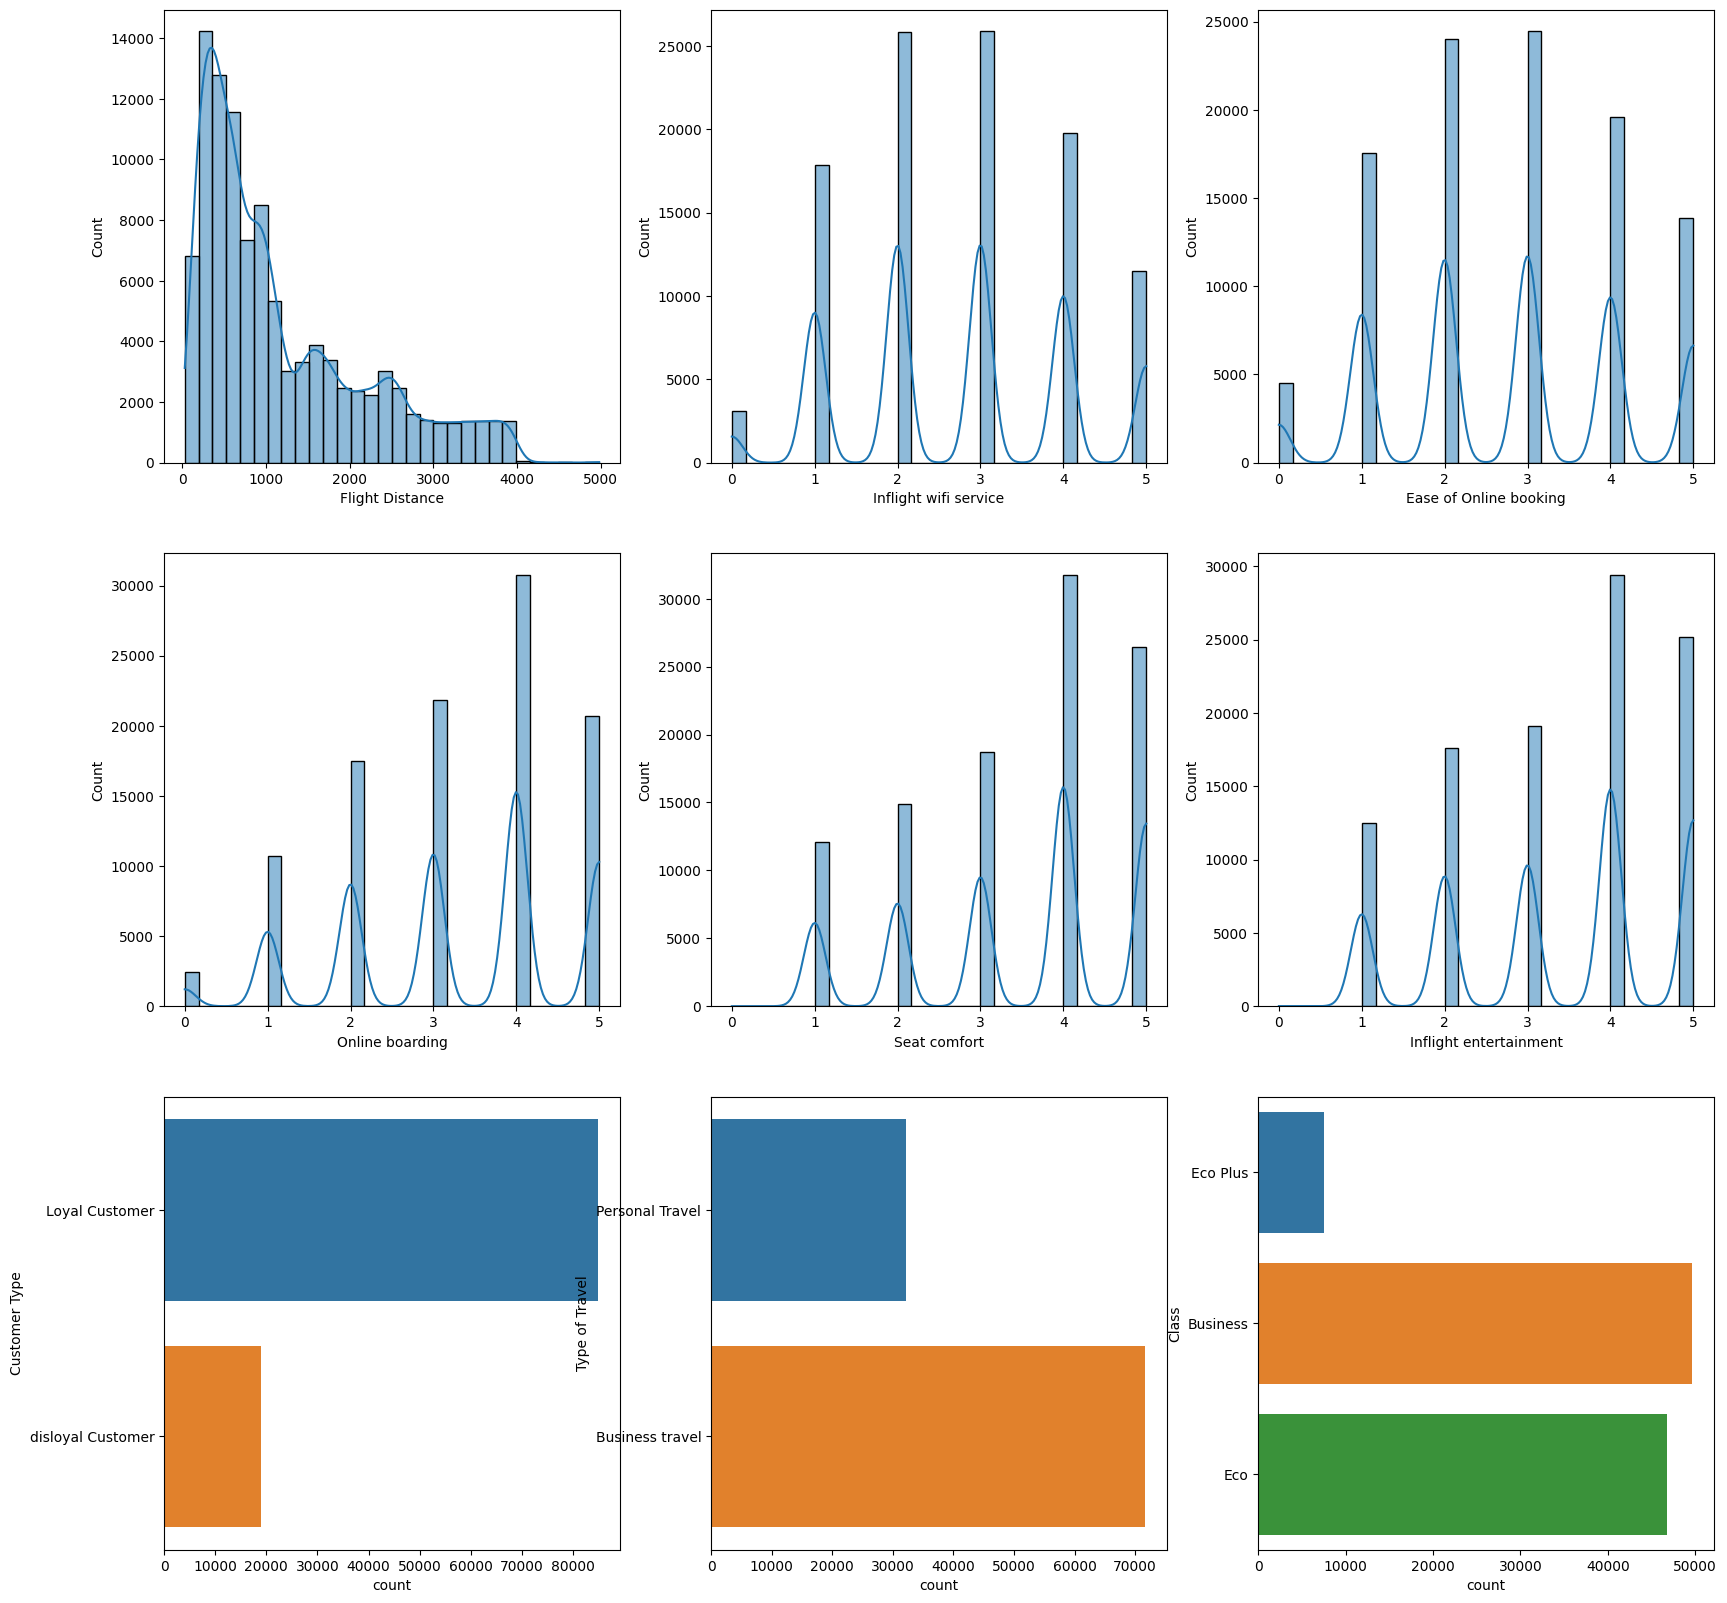

In [5]:
plt.subplots(3, 3, figsize=(20, 20))
for i in range(1, 7):
    plt.subplot(3, 3, i)
    sns.histplot(data.iloc[:, i + 2], bins=30, kde=True)
    
for i in range(7, 10):
    plt.subplot(3, 3, i)
    sns.countplot(y=data.iloc[:, i - 7])

# Pre-processing (15 pint)
In this section, we perform some pre-processing to make the data ready for models.

## Task 1: Handling Missing Values (2 point)
In this task, we will handle missing values by [dropping](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) records that contain missing values.

In [6]:
data.dropna()

,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Online boarding,Seat comfort,Inflight entertainment,satisfaction
0,Loyal Customer,Personal Travel,Eco Plus,460,3,3,3,5,5,neutral or dissatisfied
1,disloyal Customer,Business travel,Business,235,3,3,3,1,1,neutral or dissatisfied
2,Loyal Customer,Business travel,Business,1142,2,2,5,5,5,satisfied
3,Loyal Customer,Business travel,Business,562,2,5,2,2,2,neutral or dissatisfied
4,Loyal Customer,Business travel,Business,214,3,3,5,5,3,satisfied
...,...,...,...,...,...,...,...,...,...,...
103899,disloyal Customer,Business travel,Eco,192,2,2,2,2,2,neutral or dissatisfied
103900,Loyal Customer,Business travel,Business,2347,4,4,4,5,5,satisfied
103901,disloyal Customer,Business travel,Business,1995,1,1,1,5,4,neutral or dissatisfied
103902,disloyal Customer,Business travel,Eco,1000,1,1,1,1,1,neutral or dissatisfied


## Task 2: Converting Categorical Variables to Numeric (7 point)
We will use [one-hot encoding](https://www.kdnuggets.com/2023/07/pandas-onehot-encode-data.html) to convert categorical variables into a format that can be provided to ML algorithms. Also convert the categorical target variable 'satisfaction' into numeric format, where 'satisfied' is mapped to 1 and 'neutral or dissatisfied' is mapped to 0.

In [7]:
data['Customer Type'] = pd.factorize(data['Customer Type'])[0]
data['Type of Travel'] = pd.factorize(data['Type of Travel'])[0]
data['Class'] = pd.factorize(data['Class'])[0]
data['satisfaction'] = pd.factorize(data['satisfaction'])[0]

data.head(10)

,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Online boarding,Seat comfort,Inflight entertainment,satisfaction
0,0,0,0,460,3,3,3,5,5,0
1,1,1,1,235,3,3,3,1,1,0
2,0,1,1,1142,2,2,5,5,5,1
3,0,1,1,562,2,5,2,2,2,0
4,0,1,1,214,3,3,5,5,3,1
5,0,0,2,1180,3,2,2,1,1,0
6,0,0,2,1276,2,2,2,2,2,0
7,0,1,1,2035,4,4,5,5,5,1
8,0,1,1,853,1,2,3,3,1,0
9,1,1,2,1061,3,3,3,3,2,0


## Task 3: Splitting the Data into Training and Test Sets(6 point)
Finally, [split your data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) into training and test sets. This is a critical step for training and evaluating the performance of your models.

In [8]:
X = np.array(data.iloc[:, 0:9])
y = np.array(data.iloc[:, 9])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('Train Set: X ->', X_train.shape, '| y ->', y_train.shape)
print('Test Set: X ->', X_test.shape, '| y ->', y_test.shape)

Train Set: X -> (83123, 9) | y -> (83123,)
Test Set: X -> (20781, 9) | y -> (20781,)


<font size=3>
Now that our data is prepared and we have separate training and testing datasets, along with the necessary preprocessing completed, we are ready to move on to the model building and training phase. We will start with the Naive Bayes classifier, which is our first model in this series of experiments.

# Naive Bayes Classifier (25 point)

## Task 1: Implement Naive Bayes Classifier from Scratch (15 point)
In this task, you will implement the [Naive Bayes Classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) from scratch. This will involve calculating the prior probabilities for each class, the likelihood of the data given the class, and using these to calculate the posterior probabilities for the prediction.


[This video](https://www.youtube.com/watch?v=O2L2Uv9pdDA) will be helpful too.
Especially [this model](https://www.youtube.com/watch?v=H3EjCKtlVog).


In [9]:
class NaiveBayesClassifier:
    def __init__(self):
        """
        Initialize the Naive Bayes Classifier with dictionaries for means, variances,
        and priors of each class.

        Inputs:
        None

        Outputs:
        An instance of the NaiveBayesClassifier with initialized storage for model parameters.
        """
        self.classes = None
        self.means = {}
        self.variances = {}
        self.priors = {}
        

    def fit(self, X, y):
        """
        Fit the Naive Bayes Classifier according to X, a dataset with features, and y,
        the corresponding labels.

        Inputs:
        - X: A 2D numpy array of shape (n_samples, n_features) representing the training data.
        - y: A 1D numpy array of shape (n_samples,) representing the class labels for each
             training sample.

        Outputs:
        None, but the fit method updates the classifier's parameters (mean, var, priors) based
        on the training data.
        """
        self.classes = np.unique(y)
        for label in self.classes:
            X_label = X[y == label]
            self.means[label] = X_label.mean(axis=0)
            self.variances[label] = X_label.var(axis=0)
            self.priors[label] = X_label.shape[0] / X.shape[0]

            
    def gaussian_pdf(self, class_idx, x):
        """
        Calculate the Gaussian probability density function for a given class index and a single sample.

        Inputs:
        - class_idx: The index of the class for which the probability is calculated.
        - x: A 1D numpy array of feature values for a single sample.

        Outputs:
        - The probability of x given the class index, computed using the Gaussian PDF.

        Note: This function is specific to Gaussian Naive Bayes. If another variant of Naive Bayes
        is used (e.g., Multinomial Naive Bayes), this function may not be necessary and can be omitted.
        """
        mean = self.means[class_idx]
        var = self.variances[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator
    

    def predict(self, X):
        """
        Perform classification on an array of test vectors X.

        Inputs:
        - X: A 2D numpy array of shape (n_samples, n_features) representing the test data.

        Outputs:
        - A 1D numpy array of shape (n_samples,) containing the predicted class labels for each
          test sample.
        """
        y_pred = []
        for x in X:
            posteriors = []
            for cls in self.classes:
                prior = np.log(self.priors[cls])
                posterior = np.sum(np.log(self.gaussian_pdf(cls, x)))
                posterior += prior
                posteriors.append(posterior)
            y_pred.append(self.classes[np.argmax(posteriors)])
        return np.array(y_pred)

## Task 2: Train Naive Bayes Model from Scratch (2 point)
Instantiate the NaiveBayesClassifier class and fit it to the training data.

In [10]:
naive_bayes = NaiveBayesClassifier()
naive_bayes.fit(X_train, y_train)

## Task 3: Train Naive Bayes Model Using scikit-learn (5 point)
Utilize the [Naive Bayes class from scikit-learn](https://scikit-learn.org/stable/modules/naive_bayes.html) to train a Naive Bayes model on the same dataset.

In [11]:
from sklearn.naive_bayes import GaussianNB

naive_bayes2 = GaussianNB()
naive_bayes2.fit(X_train, y_train)

GaussianNB()

## Task 4: Evaluate and Compare Both Models (3 point)
Evaluate both the custom-built Naive Bayes model and the scikit-learn model. The primary metric for comparison is accuracy, which is sufficient for earning full points on this task. Optionally, you can also use a [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) to further analyze and compare their performance in terms of [accuracy, precision, recall, and F1 score](https://www.labelf.ai/blog/what-is-accuracy-precision-recall-and-f1-score).
Please note that while the main focus is on comparing the accuracy, the output you see in this cell will be a confusion matrix if you choose to include additional metrics. This is encouraged as it provides a more comprehensive view of model performance but is not mandatory for meeting the basic requirements of the task.

In [12]:
y_pred = naive_bayes.predict(X_test)
# y_pred = np.array(['satisfied' if y == 1 else 'neutral or dissatisfied' for y in y_pred])
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


y_pred2 = naive_bayes2.predict(X_test)
# y_pred2 = np.array(['satisfied' if y == 1 else 'neutral or dissatisfied' for y in y_pred2])
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[10289  1456]
 [ 1575  7461]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     11745
           1       0.84      0.83      0.83      9036

    accuracy                           0.85     20781
   macro avg       0.85      0.85      0.85     20781
weighted avg       0.85      0.85      0.85     20781

[[10268  1477]
 [ 1564  7472]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     11745
           1       0.83      0.83      0.83      9036

    accuracy                           0.85     20781
   macro avg       0.85      0.85      0.85     20781
weighted avg       0.85      0.85      0.85     20781



# Decision tree Classifier (25 point)

## Task 1: Implement Decision Tree Classifier from Scratch (15 point)
In this task, you are to implement a [Decision Tree Classifier](https://en.wikipedia.org/wiki/Decision_tree) entirely from scratch. The core framework of the classifier has been outlined for you, including several helper methods that you might find useful. These methods are intended to guide your implementation and provide a structured way to approach the problem.You are not strictly bound to the provided private methods (`_compute_entropy`, `_split_data`, etc.). If you find a more efficient or clearer way to implement these functionalities, you are encouraged to adjust the methods accordingly.

[This video](https://www.youtube.com/watch?v=_L39rN6gz7Y) will be helpful too.

In [13]:
class MyDecisionTreeClassifier:
    def __init__(self, max_depth=None):
        """
        Initialize the Decision Tree Classifier with an optional maximum depth.
        Inputs:
        - max_depth: The maximum depth of the tree. If None, the tree can grow until all leaves are pure or other stopping criteria are met.
        Outputs:
        An instance of the DecisionTreeClassifier with initial settings.
        """
        self.max_depth = max_depth
        self.tree = None
        

    def fit(self, X, y):
        """
        Fit the decision tree classifier using the training data X and labels y.
        Inputs:
        - X: 2D numpy array of shape (n_samples, n_features) representing the feature data.
        - y: 1D numpy array of shape (n_samples,) representing the labels.
        Outputs:
        None, but this method updates the classifier's tree structure based on the training data.
        """
        self.tree = self._build_tree(X, y, depth=0)
        

    def predict(self, X):
        """
        Predict the class labels for the input features X.
        Inputs:
        - X: 2D numpy array of shape (n_samples, n_features) representing the feature data.
        Outputs:
        - predictions: 1D numpy array of shape (n_samples,) containing the predicted class labels.
        """
        return np.array([self._traverse_tree(sample, self.tree) for sample in X])
    

    def _compute_entropy(self, y):
        """
        Compute the entropy of label array y.
        Inputs:
        - y: 1D numpy array of class labels.
        Outputs:
        - entropy: A float representing the entropy of the label distribution.
        """
        labels, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy
    

    def _split_data(self, X, y, feature_index, threshold):
        """
        Split the data into left and right branches based on the given feature index and threshold.
        Inputs:
        - X: 2D numpy array of feature data.
        - y: 1D numpy array of labels.
        - feature_index: Index of the feature used for splitting the data.
        - threshold: The value to split the feature upon.
        Outputs:
        - X_left, X_right, y_left, y_right: Arrays representing the split of data and labels.
        """
        left_condition = X[:, feature_index] <= threshold
        right_condition = X[:, feature_index] > threshold
        return X[left_condition], X[right_condition], y[left_condition], y[right_condition]
    

    def _find_best_split(self, X, y):
        """
        Find the best split for the decision tree based on entropy.
        Inputs:
        - X: 2D numpy array of feature data.
        - y: 1D numpy array of labels.
        Outputs:
        - best_feature_index, best_threshold: Indices and thresholds that give the best split based on entropy.
        """
        best_feature_index = None
        best_threshold = None
        best_IG = -1
        current_entropy = self._compute_entropy(y)

        n_samples, n_features = X.shape
        for feature_index in range(n_features):
            possible_thresholds = np.unique(X[:, feature_index])
            for threshold in possible_thresholds:
                X_left, X_right, y_left, y_right = self._split_data(X, y, feature_index, threshold)
                if len(y_left) > 0 and len(y_right) > 0:
                    p_left = len(y_left) / n_samples
                    p_right = len(y_right) / n_samples
                    entropy_left = self._compute_entropy(y_left)
                    entropy_right = self._compute_entropy(y_right)
                    IG = current_entropy - (p_left * entropy_left + p_right * entropy_right)

                    if IG > best_IG:
                        best_IG = IG
                        best_feature_index = feature_index
                        best_threshold = threshold

        return best_feature_index, best_threshold
    

    def _build_tree(self, X, y, depth):
        """
        Recursively build the decision tree.
        Inputs:
        - X: 2D numpy array of feature data.
        - y: 1D numpy array of labels.
        - depth: Current depth of the tree.
        Outputs:
        - A tree represented as a dictionary.
        """
        n_samples, n_features = X.shape
        labels = np.unique(y)

        if len(labels) == 1:
            return labels[0]

        if self.max_depth is not None and depth >= self.max_depth:
            return st.mode(y)

        best_feature_index, best_threshold = self._find_best_split(X, y)
        if best_feature_index is None:
            return st.mode(y)

        X_left, X_right, y_left, y_right = self._split_data(X, y, best_feature_index, best_threshold)
        left_tree = self._build_tree(X_left, y_left, depth + 1)
        right_tree = self._build_tree(X_right, y_right, depth + 1)

        return {
            'feature_index': best_feature_index,
            'threshold': best_threshold,
            'left': left_tree,
            'right': right_tree
        }
    
    
    def _traverse_tree(self, sample, node):
        """
        Predict the class label for a single sample using the decision tree.

        Inputs:
        - sample: 1D numpy array representing a single sample's feature values.
        - tree: The decision tree.

        Outputs:
        - The predicted class label for the sample.
        """
        if isinstance(node, dict):
            feature_index = node['feature_index']
            threshold = node['threshold']
            if sample[feature_index] <= threshold:
                return self._traverse_tree(sample, node['left'])
            else:
                return self._traverse_tree(sample, node['right'])
        else:
            return node

## Task 2: Train Decision Tree Model from Scratch (2 point)
Instantiate the DecisionTree class and fit it to the training data.

In [14]:
decision_tree = MyDecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, y_train)

## Task 3: Train Decision Tree Model Using scikit-learn (5 point)
Utilize the [Decision Tree class from scikit-learn](https://scikit-learn.org/stable/modules/tree.html) to train a Decision Tree model on the same dataset.

In [15]:
from sklearn.tree import DecisionTreeClassifier

decision_tree2 = DecisionTreeClassifier(max_depth=5)
decision_tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

## Task 4: Evaluate and Compare Both Models (3 points)

Evaluate both the custom-built Decision Tree model and the scikit-learn model. The primary metric for comparison is accuracy, which is sufficient for earning full points on this task. Optionally, you can also use a confusion matrix to further analyze and compare their performance in terms of accuracy, precision, recall, and F1 score.
Please note that while the main focus is on comparing the accuracy, the output you see in this cell will be a confusion matrix if you choose to include additional metrics. This is encouraged as it provides a more comprehensive view of model performance but is not mandatory for meeting the basic requirements of the task.


In [16]:
y_pred = decision_tree.predict(X_test)
# y_pred = np.array(['satisfied' if y == 1 else 'neutral or dissatisfied' for y in y_pred])
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


y_pred2 = decision_tree2.predict(X_test)
# y_pred2 = np.array(['satisfied' if y == 1 else 'neutral or dissatisfied' for y in y_pred2])
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[11399   346]
 [ 1625  7411]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     11745
           1       0.96      0.82      0.88      9036

    accuracy                           0.91     20781
   macro avg       0.92      0.90      0.90     20781
weighted avg       0.91      0.91      0.90     20781

[[11245   500]
 [ 1509  7527]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     11745
           1       0.94      0.83      0.88      9036

    accuracy                           0.90     20781
   macro avg       0.91      0.90      0.90     20781
weighted avg       0.91      0.90      0.90     20781

